In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
stressed_coralreef = '/content/drive/MyDrive/train/stressed coral reef images/*'
healthy_coralreef = '/content/drive/MyDrive/train/healthy coral reef images/*'

In [3]:
x_train = list()
y_train = list() 

for img_path in glob(healthy_coralreef):
    input_img = load_img(img_path, target_size=(224,224))
    input_img = np.array(input_img)
    x_train.append(input_img)
    y_train.append(0) 

for img_path in glob(stressed_coralreef):
    input_img = load_img(img_path, target_size=(224,224))
    input_img = np.array(input_img)
    x_train.append(input_img)
    y_train.append(1)

In [4]:
healthy = '/content/drive/MyDrive/test/healthy/*'
stressed = '/content/drive/MyDrive/test/stressed/*'

In [5]:
x_test = list()
y_test = list() 

for img_path in glob(healthy):
    input_img = load_img(img_path, target_size=(224,224))
    input_img = np.array(input_img)
    x_test.append(input_img)
    y_test.append(0) 

for img_path in glob(stressed):
    input_img = load_img(img_path, target_size=(224,224))
    input_img = np.array(input_img)
    x_test.append(input_img)
    y_test.append(1)

In [7]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [10]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [11]:
x_train.shape

(104, 224, 224, 3)

In [27]:
x_train = x_train.reshape(-1,224,224,3).astype(float)
x_test = x_test.reshape(-1,224,224,3).astype(float)

In [28]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

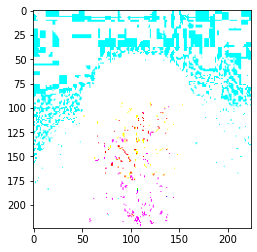

In [29]:
plt.imshow(x_train[0])
plt.show()

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.layers import Activation

In [57]:
model = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224,224,3)), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)]) 

In [58]:
model.compile(loss='binary_crossentropy',
  optimizer='adam',metrics=['accuracy'])

In [59]:
history = model.fit(x=x_train, y=y_train, epochs=5,batch_size=4,validation_split=0.2, shuffle=True)

Epoch 1/5
21/21 [==============================] - 20s 891ms/step - loss: 9.7578 - accuracy: 0.6145 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
21/21 [==============================] - 17s 794ms/step - loss: 2.0781 - accuracy: 0.9398 - val_loss: 42.3827 - val_accuracy: 0.4762
Epoch 3/5
21/21 [==============================] - 21s 989ms/step - loss: 4.3090 - accuracy: 0.9036 - val_loss: 48.2004 - val_accuracy: 0.2381
Epoch 4/5
21/21 [==============================] - 18s 874ms/step - loss: 2.2068 - accuracy: 0.9398 - val_loss: 9.1788 - val_accuracy: 0.9048
Epoch 5/5
21/21 [==============================] - 20s 939ms/step - loss: 1.7658 - accuracy: 0.9759 - val_loss: 11.1144 - val_accuracy: 0.7143


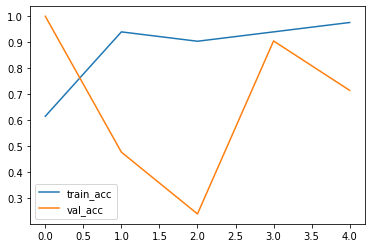

In [60]:
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

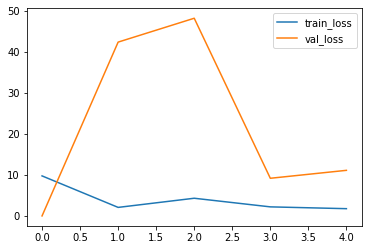

In [61]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [93]:
predictions = model.predict(x_test)
y_pred = (predictions > 0.1)

1/1 [==============================] - 0s 366ms/step


In [94]:
matrix = confusion_matrix(y_test, y_pred)

In [95]:
matrix

array([[ 9,  1],
       [ 0, 10]])

In [96]:
accuracy_score(y_test,y_pred)

0.95

In [97]:
print('Classification Report')
target_names = ['Healthy', 'Stressed']
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     Healthy       1.00      0.90      0.95        10
    Stressed       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

